In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random

nltk.download('stopwords')
  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Data Import
data = pd.read_json('reviewSelected100.json', lines=True, 
                    orient='records',encoding = "ISO-8859-1")

# Select business b1 and prepare B1
uniqueBusiness = data['business_id'].unique()
idx = random.randint(0, len(uniqueBusiness)-1)
print('random number for b1: ', idx)
b1 = uniqueBusiness[idx]
print(b1)
B1 = data.loc[data['business_id'] == b1]
B1 = pd.DataFrame(B1, columns = ['text'])
B1.rename(columns={"text": "original_text"}, inplace = True)

random number for b1:  108
ZhACHVw9k438Z3i-Gw9BHA


In [5]:
B1.reset_index(inplace = True)
B1.drop(['index'], axis=1, inplace = True)
B1

,original_text
0,one of the few chains i would go over and over...
1,Small seating available but service was prompt...
2,"I love bao , haven't had it in a long time and..."
3,Banh Mi is that place to go when you want to s...
4,"The service is ok but I didn't like the food, ..."
...,...
95,"I definitely overhyped myself for this place, ..."
96,"I'm Vietnamese and I never really like ""banh m..."
97,"Yes, that's right, I'm going a full five stars..."
98,5 Stars for the grilled pork banh mi! - These ...


In [6]:
# Remove stopwords
for rowIdx in range(len(B1)):
    newString = ''
    s = B1.iloc[rowIdx]['original_text'].lower()
    for idx, word in enumerate(s.split(' ')):
        if word not in stopwords.words('english'):
            if idx == len(s)-1:
                newString = newString + word
            else:
                newString = newString + word + ' '
    
    B1.loc[rowIdx, 'text_without_stopwords'] = newString

In [7]:
B1

,original_text,text_without_stopwords
0,one of the few chains i would go over and over...,"one chains would go proud say go to. quick, ea..."
1,Small seating available but service was prompt...,small seating available service prompt friendl...
2,"I love bao , haven't had it in a long time and...","love bao , long time location pretty excited g..."
3,Banh Mi is that place to go when you want to s...,banh mi place go want spend five bucks trendy ...
4,"The service is ok but I didn't like the food, ...","service ok like food, think mix meat raw veggi..."
...,...,...
95,"I definitely overhyped myself for this place, ...","definitely overhyped place, definitely good, e..."
96,"I'm Vietnamese and I never really like ""banh m...","i'm vietnamese never really like ""banh mi"" tor..."
97,"Yes, that's right, I'm going a full five stars...","yes, that's right, i'm going full five stars t..."
98,5 Stars for the grilled pork banh mi! - These ...,5 stars grilled pork banh mi! - grandfather's ...


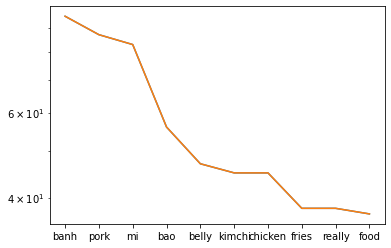

In [8]:
# Stemming
ps = PorterStemmer()
B1['stemmed_text'] = B1['text_without_stopwords'].apply(lambda x: ps.stem(x))

# Word Frequency Before Stemming
countsBefore = B1.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

# Word Frequency After Stemming
countsAfter = B1.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

In [9]:
# Select business b2 and prepare B2
uniqueBusiness = data['business_id'].unique()
idx2 = random.randint(0, len(uniqueBusiness)-1)
print('random num for b2: ', idx2)
b2 = uniqueBusiness[idx2]
print(b2)
B2 = data.loc[data['business_id'] == b2]
B2 = pd.DataFrame(B2, columns = ['text'])
B2.rename(columns={"text": "original_text"}, inplace = True)

random num for b2:  70
Jol7cXrDmKKmu_V6qp4wMA


In [10]:
B2.reset_index(inplace = True)
B2.drop(['index'], axis=1, inplace = True)
B2

,original_text
0,The food here is amazing! Authentic Mediterran...
1,"Delicious, inexpensive and large portions... ..."
2,This place is my favorite for lunch! After di...
3,Oh my!! Not only was this some of the best Mi...
4,I spent 9 months in the middle east and fell i...
...,...
95,First time here and the food was delicious! I...
96,I went back here today with the same cowoker a...
97,Really good stuff. Authentic. Wide variety of ...
98,There isn't any other place I think I could ea...


In [11]:
# Remove stopwords
for rowIdx in range(len(B2)):
    newString = ''
    s = B2.iloc[rowIdx]['original_text'].lower()
    for idx, word in enumerate(s.split(' ')):
        if word not in stopwords.words('english'):
            if idx == len(s)-1:
                newString = newString + word
            else:
                newString = newString + word + ' '
    
    B2.loc[rowIdx, 'text_without_stopwords'] = newString

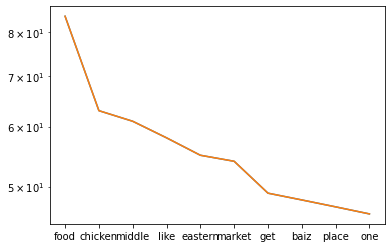

In [12]:
# Stemming
ps = PorterStemmer()
B2['stemmed_text'] = B2['text_without_stopwords'].apply(lambda x: ps.stem(x))

# Word Frequency Before Stemming
countsBefore = B2.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

# Word Frequency After Stemming
countsAfter = B2.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")